In [1]:
%matplotlib inline  

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import ipywidgets as widgets  
import itertools
import inspect
from IPython.display import display


In [3]:
phy_therapist=['Lars Ulrik Pedersen',
'Anne Sylvester Walters',
'Jacob Carsting',
'Ida Lundager Kraaer',
'Jesper Jin Leen Larsen',
'Anders Kjærulff Møller',
'Niklas Dunker Gammelmark',
'Stefan Koch Jacobsen']

bk_assistant=['Linda Wichmann',
'Qillaq Thomas Moesgaard',
'Bente Stigborg',
'Marie-Louise Fugl Madsen', 
'Natascha Jensen Dresler',
'Dina Larn Bonsvig',
'Markus Kochendorff Støvring',
'Hafsah Tasneem',
'Kristina Halvorseth',
'Stephanie Dam',
'Gitte Larsen',
'Nicolai Linnemann',
'Maria Fleischer',
'Mia Douglas',
'Elizabeth Jeppesen',
'Marianne Brandt',
'Lone Bruun Houmøller']

morning_team=['Mia Douglas','Marianne Brandt','Elizabeth Jeppesen']




In [4]:
ag_names=widgets.Dropdown(
    options=['Stephanie Dam','Hafsah Tasneem','Jesper Jin Leen Larsen','Anne Sylvester Walters','Linda Wichmann'],
    value='Stephanie Dam',
    description='Agents',
    disabled=False,
)

select_att=widgets.Dropdown(
    options=['Login-timer / dag','Indgående Opkald per dag','Udgående Opkald per dag','Tabte Opkald per dag', 'Samtale (min) per Opkald',
       'Aktiv/Klar (T) - Samlet per dag', 
       'Samtale (T) - per dag', 'Klar (T) - per dag',
        'Administration (T) - per dag',
        'Pause (T) - per dag',
        'ikke klar (T) Andet - per dag',
        'Ukendt/Andet (T) - per dag'],
    value='Login-timer / dag',
    description='Attributes',
    disabled=False,
)

select_index=widgets.Dropdown(
    options=['Weekly','Monthly'],
    value='Weekly',
    description='Select Weekly or Monthly comparion',
    disabled=False,
)

In [5]:
ag_names

Dropdown(description='Agents', options=('Stephanie Dam', 'Hafsah Tasneem', 'Jesper Jin Leen Larsen', 'Anne Syl…

In [6]:
percentages= ['Aktiv/Klar - Samtale','Aktiv/Klar - Klar','Aktiv/Klar - Admininistrativt','Ikke Klar - Pause','Ikke Klar - Andet']
col_list=['Login-timer / dag','Tabte Opkald per dag', 'Samtale (min) per Opkald',
       'Aktiv/Klar (T) - Samlet per dag', 
       'Samtale (T) - per dag', 'Klar (T) - per dag',
        'Administration (T) - per dag',
        'Pause (T) - per dag',
        'ikke klar (T) Andet - per dag',
        'Ukendt/Andet (T) - per dag']
float_col_list=col_list+percentages
def remove_percentages_and_change_to_float_add_coloumn(df):
   
    for i in percentages:
        df[i]=list(map(lambda x: x[:-1], df[i].values))
    df[float_col_list]=df[float_col_list].astype(float)
    df['In-Ud sum']=df['Indgående Opkald per dag'] + df['Udgående Opkald per dag']

In [7]:
def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]
#for i in weekslist:
 #   i['Period']=retrieve_name(i)[0]

###Removing % signs from data

percentages= ['Aktiv/Klar - Samtale','Aktiv/Klar - Klar','Aktiv/Klar - Admininistrativt','Ikke Klar - Pause','Ikke Klar - Andet']
def remove_percentages_and_to_float(df):
    for i in percentages:
        df[i]=list(map(lambda x: x[:-1], df[i].values))
        df[i]=df[i].astype(float)
        

In [8]:
jan_w1=pd.read_csv("jan_1.csv", sep=',',decimal=".")
jan_w2=pd.read_csv("jan_2.csv", sep=',',decimal=".")
jan_w3=pd.read_csv("jan_3.csv", sep=',',decimal=".")
jan_w4=pd.read_csv("jan_4.csv", sep=',',decimal=".")
jan_w5=pd.read_csv("jan_5.csv", sep=',',decimal=".")
feb_w1=pd.read_csv("feb_week1.csv", sep=',',decimal=",")
feb_w2=pd.read_csv("feb_week2.csv", sep=',',decimal=",")
feb_w3=pd.read_csv("feb_week3.csv", sep=',',decimal=",")
Oct2019=pd.read_csv("October.csv", sep=',',decimal=",")
Nov2019=pd.read_csv("November.csv", sep=',',decimal=",")
Dec2019=pd.read_csv("December.csv", sep=',',decimal=",")
Jan2020=pd.read_csv("January_2020.csv", sep=',',decimal=",")
Feb2020=pd.read_csv("Feburary_2020.csv", sep=',',decimal=",")
March2020=pd.read_csv("March_2020.csv", sep=',',decimal=",")
April2020=pd.read_csv("April_2020.csv", sep=',',decimal=",")
#download new file when June starts
May2020=pd.read_csv("May_2020.csv", sep=',',decimal=",")
bonus_1st= pd.read_csv("Bonus_1st_Quarter.csv", sep=',',decimal=",")

#Update the file
bonus_2nd= pd.read_csv("Bonus_2nd_Quarter_incomplete.csv", sep=',',decimal=",")
tempweekslist=[feb_w1,feb_w2,feb_w3]
#tempweekslist=[jan_w1,jan_w2,jan_w3,jan_w4,jan_w5,feb_w1,feb_w2,feb_w3]
tempmonthlist=[Oct2019,Nov2019,Dec2019,Jan2020,Feb2020,March2020,April2020,May2020]

for i in tempweekslist:
    remove_percentages_and_change_to_float_add_coloumn(i)
    i['Period']=retrieve_name(i)[0]
for i in tempmonthlist:
    remove_percentages_and_change_to_float_add_coloumn(i)
    i['Period']=retrieve_name(i)[0]
    
remove_percentages_and_change_to_float_add_coloumn(bonus_1st)
remove_percentages_and_change_to_float_add_coloumn(bonus_2nd)
bonus_1st['Period']='Jan2020-March2020'
bonus_2nd['Period']='April2020-June2020'                       

#remove_percentages_and_change_to_float_add_coloumn(dec1)
#remove_percentages_and_change_to_float_add_coloumn(dec2)
#remove_percentages_and_change_to_float_add_coloumn(dec3)
#remove_percentages_and_change_to_float_add_coloumn(dec4)
#remove_percentages_and_change_to_float_add_coloumn(dec5)
#remove_percentages_and_change_to_float_add_coloumn(feb1)
#remove_percentages_and_change_to_float_add_coloumn(feb2)
#remove_percentages_and_change_to_float_add_coloumn(feb3)
#remove_percentages_and_change_to_float_add_coloumn(Oct2019)
#remove_percentages_and_change_to_float_add_coloumn(Nov2019)
#remove_percentages_and_change_to_float_add_coloumn(Dec2019)
#remove_percentages_and_change_to_float_add_coloumn(Jan2020)
#remove_percentages_and_change_to_float_add_coloumn(Feb2020)


monthsList=[Oct2019,Nov2019,Dec2019,Jan2020,Feb2020,March2020,April2020,May2020]
weekslist=[jan_w1,jan_w2,jan_w3,jan_w4,jan_w5,feb_w1,feb_w2,feb_w3]
weekly_index = ['Jan-Week 1', 'Week 2', 'Week 3','Week 4','Week 5','Feb-Week 1','Week 2','Week 3']
monthly_index=  ['Oct 2019','Nov 2019', 'Dec 2019', 'Jan 2020','Feb 2020','March2020','April2020','May2020']
bonuslist=[Jan2020,Feb2020,March2020] 
bonuslist2=[April2020,May2020] #add June when data is available
feb_w1.head()

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
0,Stephanie Dam,2,8.5,92,5,0.0,2.7,7.1,83 %,4.3,...,30.0,0.2,2.0,0.9,11.0,0.2,5.0,0.3,97,feb_w1
1,Linda Wichmann,2,7.9,87,1,2.5,2.0,5.5,70 %,2.9,...,24.0,0.7,8.0,1.0,13.0,1.0,4.0,0.4,88,feb_w1
2,Natascha Jensen Dresler,2,9.0,84,12,1.0,1.7,6.1,68 %,2.7,...,27.0,1.0,11.0,1.1,13.0,1.5,2.0,0.2,96,feb_w1
3,Gitte Larsen,2,8.5,79,5,0.5,3.2,7.4,87 %,4.5,...,20.0,1.2,14.0,0.6,7.0,0.3,3.0,0.3,84,feb_w1
4,Elizabeth Jeppesen,2,8.1,72,13,0.5,2.7,6.8,83 %,3.8,...,23.0,1.1,13.0,0.5,6.0,0.7,1.0,0.1,85,feb_w1


In [9]:
temp=[jan_w1,jan_w2,jan_w3,jan_w4,jan_w5]

# Pie Chart for agents

In [10]:
ag_names

Dropdown(description='Agents', options=('Stephanie Dam', 'Hafsah Tasneem', 'Jesper Jin Leen Larsen', 'Anne Syl…

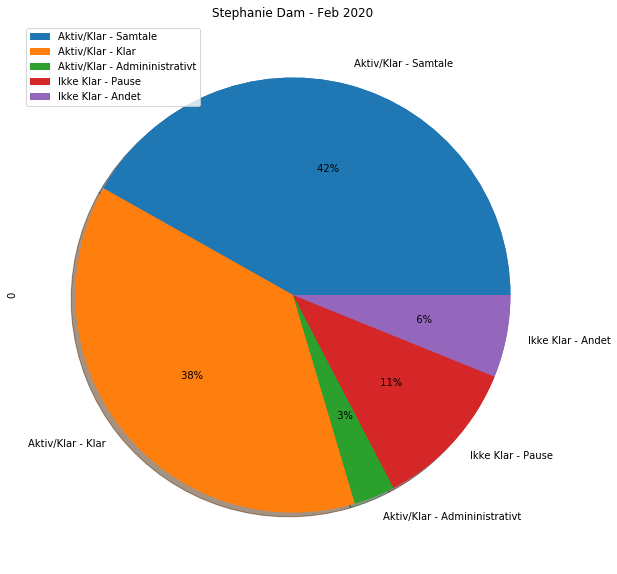

In [11]:

def get_pie_chart(df,ag_names, title):
    agentname=ag_names.value
    ag_per=['AgentName','Aktiv/Klar - Samtale','Aktiv/Klar - Klar','Aktiv/Klar - Admininistrativt','Ikke Klar - Pause','Ikke Klar - Andet']
    temp1=df[ag_per]
    temp2=temp1.loc[temp1['AgentName']==agentname]
    temp3=temp2.transpose()
    sizes=temp3[1:].iloc[:, 0].tolist()
    sizes = list(map(int, sizes))
    y=temp3.columns.to_list()
    #print(temp3)
    temp3[1:].plot.pie(y=y,figsize=(15, 10))
    plt.pie(sizes, autopct='%3.0f%%', #pctdistance=1.2, labeldistance=1.87,radius=1.35,explode=explode,
        shadow=True)
    plt.legend(loc='upper left')
    plt.title(agentname +' - ' +title)
    plt.savefig(agentname+' '+title)
    plt.show()

get_pie_chart(Feb2020,ag_names, 'Feb 2020')   

# Self comparison

In [12]:
import ipywidgets as widgets

In [13]:
select_att=widgets.Dropdown(
    options=['Login-timer / dag','Indgående Opkald per dag','Udgående Opkald per dag','Tabte Opkald per dag', 'Samtale (min) per Opkald',
       'Aktiv/Klar (T) - Samlet per dag', 
       'Samtale (T) - per dag', 'Klar (T) - per dag',
        'Administration (T) - per dag',
        'Pause (T) - per dag',
        'ikke klar (T) Andet - per dag',
        'Ukendt/Andet (T) - per dag'],
    value='Login-timer / dag',
    description='Attributes',
    disabled=False,
)

def get_all_data_for_agent(df):
    temp= df.loc[df['AgentName']==agentname]
    return temp

def get_att_data_for_agent(df,agentname,att):
    temp= df.loc[df['AgentName']==agentname]
    ag_att=temp.iloc[0][att]
    return ag_att

def get_inbound_outbound(df,agentname):
    temp= df.loc[df['AgentName']==agentname]
    if temp.empty:
        count=0
    else:
        inbound=temp.iloc[0]['Indgående Opkald per dag']
        outbound=temp.iloc[0]['Udgående Opkald per dag']
        count=inbound+outbound
    return count

In [14]:
ag_names

Dropdown(description='Agents', options=('Stephanie Dam', 'Hafsah Tasneem', 'Jesper Jin Leen Larsen', 'Anne Syl…

In [15]:
select_att

Dropdown(description='Attributes', options=('Login-timer / dag', 'Indgående Opkald per dag', 'Udgående Opkald …

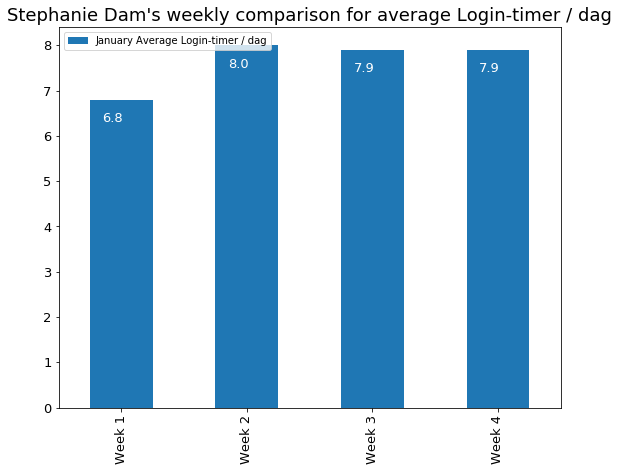

In [16]:
att=select_att.value
agentname=ag_names.value
Agent_attribute_data = [get_att_data_for_agent(jan_w1,agentname,att),get_att_data_for_agent(jan_w2,agentname,att),get_att_data_for_agent(jan_w3,agentname,att),get_att_data_for_agent(jan_w4,agentname,att)]

def give_comparison():
    index = ['Week 1', 'Week 2', 'Week 3','Week 4']
    data = pd.DataFrame({'January Average '+att: Agent_attribute_data, }, index=index)
    ax = data.plot(kind='bar', figsize=(9,7),
                                                  fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(agentname+"'s weekly comparison for average "+att, fontsize=18)
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        if i.get_height() <= 0.5:
            ax.text(i.get_x()+.1, i.get_height()-.09, \
            str(((i.get_height()))), fontsize=12,
                color='white')
        elif i.get_height() >= 10:
            ax.text(i.get_x()+.1, i.get_height()-5, \
            str(((i.get_height()))), fontsize=12,
                color='white')
        else:
             ax.text(i.get_x()+.1, i.get_height()-.5, \
            str(((i.get_height()))), fontsize=13,
                color='white')

give_comparison()

In [17]:

def give_comparison_in_outbound(Agent_inbound_outbound,index,title,legend,agentname):

    data = pd.DataFrame({legend: Agent_inbound_outbound, }, index=index)
    ax = data.plot(kind='bar', figsize=(9,7), fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(agentname + title, fontsize=18)
    
    color='white'  
    
    for i in ax.patches:
        if(agentname in bk_assistant):
            if (i.get_height() < 75):
                color='red'
            else:
                color= 'white'
        elif (agentname in phy_therapist):
            if i.get_height() < 40:
                color='red'
            else:
                color='white'
    # get_x pulls left or right; get_height pushes up or down
        if i.get_height() <= 0.5:
            ax.text(i.get_x()+.1, i.get_height()-.09, \
            str(((i.get_height()))), fontsize=12,
                color=color)

        elif i.get_height() >= 10:
            ax.text(i.get_x()+.1, i.get_height()-5, \
            str(((i.get_height()))), fontsize=12,
                color=color)
        

        else:
             ax.text(i.get_x()+.1, i.get_height()-.5, \
            str(((i.get_height()))), fontsize=13,
                color=color)
    plt.savefig(agentname+title)
    plt.show()
    
def give_comparison_adm_hour(Agent_inbound_outbound,index,title,legend,agentname):
    
    data = pd.DataFrame({legend: Agent_inbound_outbound, }, index=index)
    ax = data.plot(kind='bar', figsize=(9,7),
                                                  fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(agentname + title, fontsize=18)
    
    color='white'  
    for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
        if i.get_height() <= 0.5:
            ax.text(i.get_x()+.1, i.get_height()-.09, \
            str(((i.get_height()))), fontsize=12,
                color=color)
        elif i.get_height() >= 10:
            ax.text(i.get_x()+.1, i.get_height()-5, \
            str(((i.get_height()))), fontsize=12,
                color=color)
        else:
             ax.text(i.get_x()+.1, i.get_height()-.5, \
            str(((i.get_height()))), fontsize=13,
                color=color)
    plt.savefig(agentname+title)
    plt.show()
 

In [18]:
def give_comparison_in_outbound_v2(Agent_inbound_outbound,index,title,legends,agentname):
    
    if agentname in bk_assistant:
        KPI=75
    else:
        KPI=40
   
    #data = pd.DataFrame({legend: Agent_inbound_outbound, }, index=index)

    clrs = ['red' if (x < KPI) else 'blue' for x in Agent_inbound_outbound ]

    plt.figure(figsize=(9,7))
    plt.bar(index, Agent_inbound_outbound, color=clrs)
    #plt.xticks(y_pos, bars)
    for i in range(len(Agent_inbound_outbound)):
        plt.text(i,Agent_inbound_outbound[i]-5,Agent_inbound_outbound[i],fontsize=18, color='white')
    plt.title(agentname + title, fontsize=18)
    plt.legend([legends])
    plt.savefig(agentname+title)
    plt.show()

## Sum of inbound/outbound and weekly comparison

In [19]:
def chart_for_in_outbound_calls(ag_names,select_index):
    agentname=ag_names.value
    Agent_inbound_outbound_weekly = get_data_function(weekslist,agentname,get_inbound_outbound)
    Agent_inbound_outbound_monthly =get_data_function(monthsList,agentname,get_inbound_outbound)
#    weekly_index = ['Week 1', 'Week 2', 'Week 3','Week 4','Week5']
#    monthly_index=  ['Oct 2019','Nov 2019', 'Dec 2019', 'Jan 2020']   
    legend='Inbound + Outbound calls'
    if select_index.value=='Weekly':
        Agent_inbound_outbound=Agent_inbound_outbound_weekly
        index=weekly_index
        title= "'s In-Udgående Opkald per dag  - 31st Dec - 23rd Feb"
        give_comparison_in_outbound(Agent_inbound_outbound,index,title,legend,agentname)
    
    else:
        Agent_inbound_outbound=Agent_inbound_outbound_monthly
        index=monthly_index
        title= "'s In-Udgående Opkald per dag"
        give_comparison_in_outbound(Agent_inbound_outbound,index,title,legend,agentname)

In [20]:
def chart_for_in_outbound_calls_v2(ag_names,select_index):
    agentname=ag_names.value
    Agent_inbound_outbound_weekly = get_data_function(weekslist,agentname,get_inbound_outbound)
    Agent_inbound_outbound_monthly =  get_data_function(monthsList,agentname,get_inbound_outbound)
    legend='Inbound + Outbound calls'
    if select_index.value=='Weekly':
        Agent_inbound_outbound=Agent_inbound_outbound_weekly
        index=weekly_index
        title= "'s In-Udgående Opkald per dag  - 31st Dec - 23rd Feb"
        give_comparison_in_outbound_v2(Agent_inbound_outbound,index,title,legend,agentname)
    
    else:
        Agent_inbound_outbound=Agent_inbound_outbound_monthly
        index=monthly_index
        title= "'s In-Undgående Opkald per dag"
        give_comparison_in_outbound_v2(Agent_inbound_outbound,index,title,legend,agentname)

In [21]:
def get_avg_adm_hours(df,agentname):
    temp= df.loc[df['AgentName']==agentname]
    if temp.empty:
        count=0
    else:
        count=temp.iloc[0]['Administration (T) - per dag']
    return count

In [22]:
def get_data_function(lst,agentname,function):
    counts=[]
    for i in (lst):
        counts.append(function(i,agentname))
    return counts

In [23]:
def chart_for_admin_work(ag_names,select_index):
#    monthsList=[Oct2019,Nov2019,Dec2019,Jan2020]
#    weekslist=[dec1,dec2,dec3,dec4,dec5]
    agentname=ag_names.value
    Agent_admin_work_weekly = get_data_function(weekslist,agentname,get_avg_adm_hours)
    Agent_admin_work_monthly = get_data_function(monthsList,agentname,get_avg_adm_hours)

    legend='Administrative Hours per day'
    if select_index.value=='Weekly':
   
        index=weekly_index
        title= "'s Administration (T) - per dag - 31st Dec - 23rd Feb "
        give_comparison_adm_hour(Agent_admin_work_weekly,index,title,legend,agentname)
    
    else:
        index=monthly_index
        title= "'s Administration (T) - per dag"
        give_comparison_adm_hour(Agent_admin_work_monthly,index,title,legend,agentname)

In [24]:
# For a given attribute, this counts the number and make a chart

# get count of an attribute for an agent name and a particular dataframe
def get_count_of_att(df,agentname,att):
    temp= df.loc[df['AgentName']==agentname]
    if temp.empty: #if agent was not there - empty dataframe
        count=0
    else:
        count=temp.iloc[0][att]
    return count
#gives the chart on the bases of weekly or monthly selector for a given attribute
def chart_for_att(ag_names,select_index,att,bk_KPI,tp_KPI,legend,title):
    agentname=ag_names.value
    Agent_counts_of_att_weekly=[]
    Agent_counts_of_att_monthly=[]
    for i in weekslist: #weeklist defined at the top
        Agent_counts_of_att_weekly.append(get_count_of_att(i,agentname,att))
    
    
    for j in monthsList: #weeklist defined at the top
        Agent_counts_of_att_monthly.append(get_count_of_att(j,agentname,att))
       
    #legend='Inbound + Outbound calls'
    
    if select_index.value=='Weekly':
        index=weekly_index
        title= "'s " + title + " weekwise"
        give_comparison_for_attribute(Agent_counts_of_att_weekly,index,title,legend,agentname,bk_KPI,tp_KPI)
    
    else:
        index=monthly_index
        title=  "'s " + title + " monthwise"
        give_comparison_for_attribute(Agent_counts_of_att_monthly,index,title,legend,agentname,bk_KPI,tp_KPI)
        
def give_comparison_for_attribute(Agent_att_count_for_a_period,index,title,legends,agentname,bk_KPI,tp_KPI):
    
    if agentname in bk_assistant:
        KPI=bk_KPI 
    else:
        KPI=tp_KPI
   
    legends=legends + ' KPI: ' + str(KPI)
    clrs = ['red' if (x > KPI) else 'limegreen' for x in Agent_att_count_for_a_period ]

    plt.figure(figsize=(9,7))
    plt.bar(index, Agent_att_count_for_a_period, color=clrs)
    #plt.xticks(y_pos, bars)
    for i in range(len(Agent_att_count_for_a_period)):
        if Agent_att_count_for_a_period[i] >=10:
            height=Agent_att_count_for_a_period[i]-5
        elif (Agent_att_count_for_a_period[i] >=5):
            height= Agent_att_count_for_a_period[i]-1
        elif (Agent_att_count_for_a_period[i] <=0.5):
            height= Agent_att_count_for_a_period[i]-0.07
        elif (Agent_att_count_for_a_period[i] <=5):
            height= Agent_att_count_for_a_period[i]-0.5
        else:
            height=Agent_att_count_for_a_period[i]-0.07
        plt.text(i,height,Agent_att_count_for_a_period[i],fontsize=15, color='white')
    plt.title(agentname + title, fontsize=18)
    plt.legend([legends])
    plt.savefig(agentname+title)
    plt.show()

### Charts

In [25]:
ag_names

Dropdown(description='Agents', options=('Stephanie Dam', 'Hafsah Tasneem', 'Jesper Jin Leen Larsen', 'Anne Syl…

In [26]:
select_index

Dropdown(description='Select Weekly or Monthly comparion', options=('Weekly', 'Monthly'), value='Weekly')

weekly_index = ['Week 1', 'Week 2', 'Week 3','Week 4','Week 5']
give_comparison_in_outbound([80,0,39,81,10],weekly_index,'test','test','Stephanie Dam')

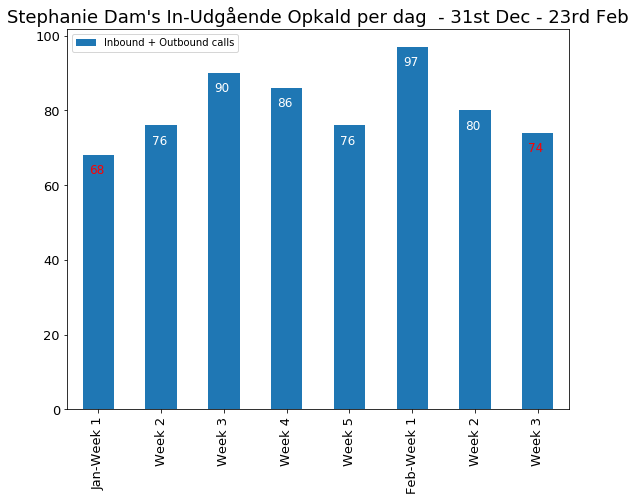

'""\nchart_for_admin_work(ag_names,select_index)\n\nattribute=\'In-Ud sum\'\nbooking_agent_kpi=75\ntherapist_kpi=40\nlegend=attribute\nchart_for_att(ag_names,select_index,attribute,booking_agent_kpi,therapist_kpi,legend,legend)\n\n\n\n\nattribute=\'Samtale (min) per Opkald\'\nbooking_agent_kpi_for_call_duration_in_min=3\ntherapist_kpi_for_call_duration_in_min=4\nlegend=attribute\nchart_for_att(ag_names,select_index,attribute,booking_agent_kpi_for_call_duration_in_min,therapist_kpi_for_call_duration_in_min,legend,legend)\n\nattribute=\'Pause (T) - per dag\'\nbooking_agent_kpi_for_pause_in_hour=1.0\ntherapist_kpi_for_pause_in_hour=1.0\nlegend=attribute\nchart_for_att(ag_names,select_index,attribute,booking_agent_kpi_for_pause_in_hour,therapist_kpi_for_pause_in_hour,legend,legend)\n\n\nif select_index.value == \'Monthly\':\n    get_pie_chart(Dec2019,ag_names,\'Dec 2019\')\n    get_pie_chart(Jan2020,ag_names,\'Jan 2020\')\n    get_pie_chart(Feb2020,ag_names,\'Jan 2020\')\n'

In [27]:
chart_for_in_outbound_calls(ag_names,select_index)
#chart_for_in_outbound_calls_v2(ag_names,select_index)
 

"""""
chart_for_admin_work(ag_names,select_index)

attribute='In-Ud sum'
booking_agent_kpi=75
therapist_kpi=40
legend=attribute
chart_for_att(ag_names,select_index,attribute,booking_agent_kpi,therapist_kpi,legend,legend)




attribute='Samtale (min) per Opkald'
booking_agent_kpi_for_call_duration_in_min=3
therapist_kpi_for_call_duration_in_min=4
legend=attribute
chart_for_att(ag_names,select_index,attribute,booking_agent_kpi_for_call_duration_in_min,therapist_kpi_for_call_duration_in_min,legend,legend)

attribute='Pause (T) - per dag'
booking_agent_kpi_for_pause_in_hour=1.0
therapist_kpi_for_pause_in_hour=1.0
legend=attribute
chart_for_att(ag_names,select_index,attribute,booking_agent_kpi_for_pause_in_hour,therapist_kpi_for_pause_in_hour,legend,legend)


if select_index.value == 'Monthly':
    get_pie_chart(Dec2019,ag_names,'Dec 2019')
    get_pie_chart(Jan2020,ag_names,'Jan 2020')
    get_pie_chart(Feb2020,ag_names,'Jan 2020')
"""""


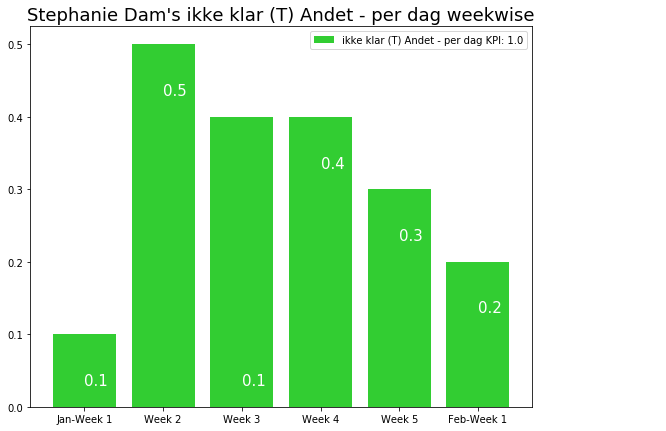

In [28]:
attribute='ikke klar (T) Andet - per dag'
booking_agent_kpi_for_pause_in_hour=1.0
therapist_kpi_for_pause_in_hour=1.0
legend=attribute
chart_for_att(ag_names,select_index,attribute,booking_agent_kpi_for_pause_in_hour,therapist_kpi_for_pause_in_hour,legend,legend)


In [29]:
# Multiple bar chart

In [30]:
def get_count_of_att_multiple(df,agentname,att):
    temp= df.loc[df['AgentName']==agentname]
    #listOfLists = [[] for i in range(len(att))]
   
    count=[]
    for i in range(len(att)):
        if temp.empty: #if agent was not there - empty dataframe
            count.append(0)
        else:
            count.append(temp.iloc[0][att[i]])
    
    return count

def get_count_wise(count1):
    count_wise=[]
    for i in range(len(count1[0])):
         count_wise.append([item[i] for item in count1])
    return count_wise

def chart_for_att_multiple(ag_names,select_index,att,title):
    agentname=ag_names
    tempAgent_counts_of_att_weekly=[]
    tempAgent_counts_of_att_monthly=[]
   
   
    for i in (weekslist):#weeklist defined at the top
        tempAgent_counts_of_att_weekly.append(get_count_of_att_multiple(i,agentname,att))
    
  
    for j in monthsList: #weeklist defined at the top
        tempAgent_counts_of_att_monthly.append(get_count_of_att_multiple(j,agentname,att))
    
    Agent_counts_of_att_weekly=get_count_wise(tempAgent_counts_of_att_weekly)

    Agent_counts_of_att_monthly=get_count_wise(tempAgent_counts_of_att_monthly)
    
    
    if select_index.value=='Weekly':
        labels=weekly_index
        agent_count_period= Agent_counts_of_att_weekly
    else:
        labels=monthly_index
        agent_count_period=Agent_counts_of_att_monthly
    x = np.arange(len(labels))  # the label locations
    width = 0.33  # the width of the bars

    fig, ax = plt.subplots()
    
    rects=[]

    w=[-width/4, width,width/4]
    w=[-.3/2,.3/2,.43]
    for i in range(len(att)):
        rects.append(ax.bar(x + w[i], agent_count_period[i], width, label=att[i]))
        
# Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels((labels))
    ax.legend()
    plt.rcParams["figure.figsize"] = [9,7]




    def autolabel(rects):
    #"""Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
   
        
    for i in rects:
        autolabel(i)

    fig.tight_layout()
    #plt.savefig(agentname+"'s Weekly "+str(att))
    plt.show()

In [31]:
col_in_hours=['Login-timer / dag',
       'Indgående Opkald per dag', 'Udgående Opkald per dag',
       'Tabte Opkald per dag', 'Samtale (min) per Opkald',
       'Aktiv/Klar (T) - Samlet per dag',
       'Samtale (T) - per dag', 'Klar (T) - per dag',
        'Administration (T) - per dag',
        'Pause (T) - per dag',
        'ikke klar (T) Andet - per dag',
        'Ukendt/Andet (T) - per dag', 'In-Ud sum']
col_selector=widgets.SelectMultiple(
    options=col_in_hours,
     value=('Aktiv/Klar (T) - Samlet per dag','Administration (T) - per dag'),
    description='Attribute Selector',
    rows=len(col_in_hours))

In [32]:
ag_names

Dropdown(description='Agents', options=('Stephanie Dam', 'Hafsah Tasneem', 'Jesper Jin Leen Larsen', 'Anne Syl…

In [33]:
select_index

Dropdown(description='Select Weekly or Monthly comparion', options=('Weekly', 'Monthly'), value='Weekly')

In [34]:
col_selector

SelectMultiple(description='Attribute Selector', index=(5, 8), options=('Login-timer / dag', 'Indgående Opkald…

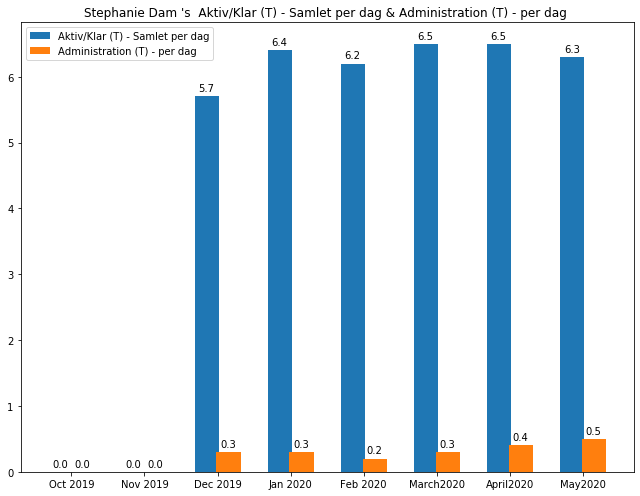

In [44]:
attt=list(col_selector.value)
#get_data_function(weekslist,agentname,get_count_of_att_multiple(Dec2019,'Linda Wichmann',attt))
booking_agent_kpi_for_pause_in_hour=1.0
therapist_kpi_for_pause_in_hour=1.0
agentname=ag_names.value
title=[agentname,"'s "]
for i in range(len(attt)):
    #if i == len(att):
    title.append(attt[i]+' &')

title=(' '.join(title))[:-1]

#title=agentname+"'s '"+attt[0]+' & '+attt[1]
chart_for_att_multiple(agentname,select_index,attt,title)

In [36]:
def get_all_data_for_agent(df,agentname):
    temp=df.loc[df['AgentName']==agentname]
    return temp
def get_data(agentname,wl):
    temp_dfs=[]
    for index,i in enumerate(wl):
         temp_dfs.append(get_all_data_for_agent(i,'Hafsah Tasneem'))
    all_data=pd.concat(temp_dfs)
    return all_data

In [37]:
len(weekslist)
#Have to change this after adding more weeks

8

In [38]:
wl_jan=weekslist[0:5]
wl_feb=weekslist[5:8]
df_all_data_jan=pd.concat(wl_jan)
ALL = 'ALL'

In [39]:
df_all_data_jan.reset_index()
df_all_data_jan.head(1)

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,Aktiv/Klar - Samtale,Klar (T) - per dag,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag
0,Anders Kjærulff Møller,2,6.9,33,12,0.0,3.6,5.8,85 %,2.7,39 %,0.8,12 %,2.3,33 %,0.9,13 %,0.0,2 %,0.1


In [40]:

dropdown_year =  widgets.Dropdown(options = df_all_data_jan.AgentName)


output_year=widgets.Output()
def dropdown_year_eventhandler(change):
    output_year.clear_output()
    with output_year:
        if (change.new == ALL):
            display(df_all_data_jan.head(3))
        else:
            display(df_all_data_jan[df_all_data_jan.AgentName == change.new])
        
dropdown_year.observe(dropdown_year_eventhandler, names='value')                    
display(dropdown_year)


Dropdown(options=('Anders Kjærulff Møller', 'Anne Sylvester Walters', 'Bente Stigborg', 'Bettina Daugaard', 'C…

In [41]:
display(output_year)

Output()

In [42]:
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    #unique.insert(0, ALL)
    return unique

In [62]:
def get_bonus_df(df,KPI):
    tempdf= df.sort_values('Indgående Opkald per dag',ascending=False)
    tempdf=tempdf.loc[tempdf['Indgående Opkald per dag']>=KPI]
    return tempdf[['AgentName','Indgående Opkald per dag']]

In [63]:
#temp=bonus_1st.loc[bonus_1st['AgentName'].isin(phy_therapist)]
#temp.loc[temp['In-Ud sum']>=40]

In [64]:
def getTop5(df):
    tempdf= df.sort_values('Indgående Opkald per dag',ascending=False)
    
    return tempdf[['AgentName','Indgående Opkald per dag']].head(5)

In [65]:
select_group=widgets.Dropdown(
    options=['Booking Assistant','Therapists'],
    value='Booking Assistant',
    description='Select',
    disabled=False,
)
select_group

Dropdown(description='Select', options=('Booking Assistant', 'Therapists'), value='Booking Assistant')

In [66]:
def get_bonus_eligible():

    if select_group.value=='Therapists':
        #bonus_thp= bonus_1st.copy()
        #bonus_thp.loc[bonus_thp['AgentName'].isin(phy_therapist)]
        return get_bonus_df(bonus_1st.loc[bonus_1st['AgentName'].isin(phy_therapist)],40)
    else:
        #bonus_bk= bonus_1st.copy()
        #bonus_bk.loc[bonus_bk['AgentName'].isin(bk_assistant)]
        return get_bonus_df(bonus_1st.loc[bonus_1st['AgentName'].isin(bk_assistant)],75)

In [67]:
get_bonus_eligible()

,AgentName,Indgående Opkald per dag


In [68]:
getTop5(bonus_1st)

,AgentName,Indgående Opkald per dag
39,Stephanie Dam,74
21,Linda Wichmann,73
9,Hafsah Tasneem,73
12,Inge Chan,66
26,Marie-Louise Fugl Madsen,66


In [69]:
def whatshouldido(current_avg,avg_to_achieve):
    return (2*avg_to_achieve)-current_avg

In [70]:
whatshouldido(81,75)

69

In [71]:
feb_w1.head(1)

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
0,Stephanie Dam,2,8.5,92,5,0.0,2.7,7.1,83 %,4.3,...,30.0,0.2,2.0,0.9,11.0,0.2,5.0,0.3,97,feb_w1


In [72]:
def whatsmystatus(agent):
    temp=bonus_1st.loc[bonus_1st['AgentName']==agent]
    if agent in phy_therapist:
        val1=temp[['Indgående Opkald per dag']].values.tolist()[0][0]
        val2=temp[['Udgående Opkald per dag']].values.tolist()[0][0]
        val=val1+val2
    elif agent in bk_assistant:
        val=temp[['Indgående Opkald per dag']].values.tolist()[0][0]
    
    return int(val)

In [73]:
whatsmystatus('Jesper Jin Leen Larsen')

31

In [74]:
whatsmystatus('Hafsah Tasneem')

73

In [75]:
whatshouldido(whatsmystatus('Anders Kjærulff Møller'),40)

41

In [76]:
print('name: ',phy_therapist[1])
print('Avg In-Ud: ',whatsmystatus(phy_therapist[1]))
print('Need this average: ',whatshouldido(whatsmystatus(phy_therapist[1]),40))

name:  Anne Sylvester Walters
Avg In-Ud:  35
Need this average:  45


In [77]:
def get_bonus_status_for_agent(agent,kpi):
    print('name: ',agent)
    status= whatsmystatus(agent)
    
    print('Current Avg In-Ud: ',status)
    print('Need this average to get bonus: ',whatshouldido(status,kpi))

In [78]:
print("\x1b[31mText in red")

Text in red


In [79]:
get_bonus_status_for_agent('Hafsah Tasneem',75)
get_bonus_status_for_agent('Stephanie Dam',75)

name:  Hafsah Tasneem
Current Avg In-Ud:  73
Need this average to get bonus:  77
name:  Stephanie Dam
Current Avg In-Ud:  74
Need this average to get bonus:  76


In [80]:
get_bonus_status_for_agent('Jesper Jin Leen Larsen',40)

name:  Jesper Jin Leen Larsen
Current Avg In-Ud:  31
Need this average to get bonus:  49


In [81]:
from IPython.display import Markdown
if whatsmystatus('Jesper Jin Leen Larsen') < 40:
    display (Markdown('Avg In-Ud <span style="color: #ff0000">red</span>.'))

Avg In-Ud <span style="color: #ff0000">red</span>.

In [82]:
bonus_1st.loc[bonus_1st['AgentName']=='Hafsah Tasneem']

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
9,Hafsah Tasneem,45,7.5,73,7,0.2,1.9,6.0,80 %,2.5,...,42.0,0.3,4.0,0.8,11.0,0.5,6.0,0.2,80,Jan2020-March2020


In [83]:
ag='Hafsah Tasneem'
a=[]
for i in monthsList:
    a.append(i.loc[i['AgentName']==ag])
ab=pd.concat(a)
ab

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
13,Hafsah Tasneem,2,6.2,37,1,0.0,3.4,4.2,69 %,2.1,...,29.0,0.3,5.0,1.0,16.0,0.9,11.0,0.0,38,Nov2019
11,Hafsah Tasneem,12,7.5,38,3,0.1,3.2,5.6,75 %,2.2,...,38.0,0.5,7.0,0.8,11.0,1.0,13.0,0.1,41,Dec2019
9,Hafsah Tasneem,21,7.8,74,8,0.1,2.3,6.0,78 %,3.1,...,34.0,0.3,4.0,0.9,12.0,0.6,7.0,0.2,82,Jan2020
1,Hafsah Tasneem,15,7.0,69,7,0.3,1.7,5.7,81 %,2.1,...,47.0,0.3,4.0,0.7,10.0,0.5,6.0,0.1,76,Feb2020
9,Hafsah Tasneem,9,7.5,78,7,0.4,1.5,6.2,83 %,2.1,...,53.0,0.2,2.0,0.8,10.0,0.3,4.0,0.2,85,March2020
7,Hafsah Tasneem,9,8.0,106,8,0.1,2.0,6.6,83 %,3.7,...,32.0,0.3,4.0,0.7,9.0,0.6,6.0,0.1,114,April2020
10,Hafsah Tasneem,14,7.3,84,9,0.6,2.0,5.5,76 %,3.1,...,26.0,0.6,8.0,0.7,10.0,0.9,5.0,0.1,93,May2020


In [84]:
ab=ab[['Period','In-Ud sum','Indgående Opkald per dag', 'Udgående Opkald per dag',
    'Samtale (min) per Opkald',
       'Aktiv/Klar (T) - Samlet per dag',
       'Samtale (T) - per dag', 'Klar (T) - per dag',
        'Administration (T) - per dag', 'Pause (T) - per dag',
       'ikke klar (T) Andet - per dag' ]]
ab=ab.rename({'In-Ud sum': 'In-Ud-sum'}, axis=1)
ab=ab.rename({'Indgående Opkald per dag': 'Indgaende-Opkald-per-dag'}, axis=1)
ab=ab.rename({'Udgående Opkald per dag': 'Udgaende-Opkald-per-dag'}, axis=1)

In [85]:
ab

,Period,In-Ud-sum,Indgaende-Opkald-per-dag,Udgaende-Opkald-per-dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Samtale (T) - per dag,Klar (T) - per dag,Administration (T) - per dag,Pause (T) - per dag,ikke klar (T) Andet - per dag
13,Nov2019,38,37,1,3.4,4.2,2.1,1.8,0.3,1.0,0.9
11,Dec2019,41,38,3,3.2,5.6,2.2,2.8,0.5,0.8,1.0
9,Jan2020,82,74,8,2.3,6.0,3.1,2.6,0.3,0.9,0.6
1,Feb2020,76,69,7,1.7,5.7,2.1,3.3,0.3,0.7,0.5
9,March2020,85,78,7,1.5,6.2,2.1,4.0,0.2,0.8,0.3
7,April2020,114,106,8,2.0,6.6,3.7,2.6,0.3,0.7,0.6
10,May2020,93,84,9,2.0,5.5,3.1,1.9,0.6,0.7,0.9


In [86]:
ab.to_csv(ag+'_pd_Monthlydata.csv',index = True)

In [87]:
def get_all_monthly(ag) :   
    a=[]
    for i in monthsList:
        a.append(i.loc[i['AgentName']==ag])
    ab=pd.concat(a)
    ab=ab[['Period','In-Ud sum','Indgående Opkald per dag', 'Udgående Opkald per dag',
    'Samtale (min) per Opkald',
       'Aktiv/Klar (T) - Samlet per dag',
       'Samtale (T) - per dag', 'Klar (T) - per dag',
        'Administration (T) - per dag', 'Pause (T) - per dag',
       'ikke klar (T) Andet - per dag' ]]
    ab=ab.rename({'In-Ud sum': 'In-Ud-sum'}, axis=1)
    ab=ab.rename({'Indgående Opkald per dag': 'Indgaende-Opkald-per-dag'}, axis=1)
    ab=ab.rename({'Udgående Opkald per dag': 'Udgaende-Opkald-per-dag'}, axis=1)
    ab.to_csv(ag+'_pd_Monthlydata.csv',index = True)

In [88]:
pie_data_coloumn=['Period','Aktiv/Klar - Samtale','Aktiv/Klar - Klar','Aktiv/Klar - Admininistrativt','Ikke Klar - Pause','Ikke Klar - Andet']

In [89]:
chart_data_coloumn=['Period','In-Ud sum','Indgående Opkald per dag', 'Udgående Opkald per dag',
    'Samtale (min) per Opkald',
       'Aktiv/Klar (T) - Samlet per dag',
       'Samtale (T) - per dag', 'Klar (T) - per dag',
        'Administration (T) - per dag', 'Pause (T) - per dag',
       'ikke klar (T) Andet - per dag' ]

In [90]:
def get_pie_data_monthly(ag):
    a=[]
    for i in monthsList:
        a.append(i.loc[i['AgentName']==ag])
    ab=pd.concat(a)
    ab=ab[pie_data_coloumn]
    ab.to_csv(ag+'_pd_pieMonthlydata.csv',index = True)
    return ab

def get_pie_data_bonus(ag,df,title):
    bonusdf=df
    temp=bonusdf.loc[bonusdf['AgentName']==ag]
    cols=pie_data_coloumn[1:]
    temp=temp[cols]
    temp.to_csv(ag+'_'+title+'_pd_pieBonusdata.csv',index = True)
    return temp

def get_bonus_data(ag,df,title):
    bonusdf=df
    temp=bonusdf.loc[bonusdf['AgentName']==ag]
    cols=chart_data_coloumn
    temp=temp[cols]
    temp.to_csv(ag+'_'+title+'_pd_chartBonusdata.csv',index = True)
    return temp

In [91]:
get_pie_data_monthly(ag)

,Period,Aktiv/Klar - Samtale,Aktiv/Klar - Klar,Aktiv/Klar - Admininistrativt,Ikke Klar - Pause,Ikke Klar - Andet
13,Nov2019,34.0,29.0,5.0,16.0,11.0
11,Dec2019,30.0,38.0,7.0,11.0,13.0
9,Jan2020,39.0,34.0,4.0,12.0,7.0
1,Feb2020,30.0,47.0,4.0,10.0,6.0
9,March2020,28.0,53.0,2.0,10.0,4.0
7,April2020,46.0,32.0,4.0,9.0,6.0
10,May2020,43.0,26.0,8.0,10.0,5.0


In [92]:
get_bonus_data(ag,bonus_2nd,'Q2')

,Period,In-Ud sum,Indgående Opkald per dag,Udgående Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Samtale (T) - per dag,Klar (T) - per dag,Administration (T) - per dag,Pause (T) - per dag,ikke klar (T) Andet - per dag
10,April2020-June2020,102,93,9,2.0,6.0,3.3,2.2,0.5,0.7,0.8


In [93]:
get_pie_data_bonus(ag,bonus_2nd,'Q2')

,Aktiv/Klar - Samtale,Aktiv/Klar - Klar,Aktiv/Klar - Admininistrativt,Ikke Klar - Pause,Ikke Klar - Andet
10,44.0,29.0,6.0,9.0,5.0


In [94]:
test=pd.read_csv("for_bonus-daily-data-4.csv", sep=',',decimal=",")

In [95]:
test.head(5)

,AgentName,Month,Day,IndgaendeOpkaldperdag,Udgående Opkald per dag,Tid - Admin per dag (H),Tid - Pause per dag (H)
0,Anne Sylvester Walters,January,2,27,8,2.4,0.5
1,Anne Sylvester Walters,January,3,12,12,3.4,0.5
2,Anne Sylvester Walters,January,6,21,16,3.2,0.6
3,Anne Sylvester Walters,January,7,22,26,2.2,0.6
4,Anne Sylvester Walters,January,8,35,17,2.0,0.5


In [96]:
test['Tid - Admin per dag (H)']=test['Tid - Admin per dag (H)'].astype(float)
test['Tid - Pause per dag (H)']=test['Tid - Pause per dag (H)'].astype(float)

In [97]:
test.dtypes

AgentName                   object
Month                       object
Day                          int64
IndgaendeOpkaldperdag        int64
Udgående Opkald per dag      int64
Tid - Admin per dag (H)    float64
Tid - Pause per dag (H)    float64
dtype: object

In [98]:
hafsah=test.loc[test['AgentName']=='Hafsah Tasneem']

In [99]:
(hafsah['IndgaendeOpkaldperdag'].sum()/len(hafsah))

73.76190476190476

# Post Covid break

In [100]:
#Updated
def whatsmystatus(agent):
    temp=bonus_1st.loc[bonus_1st['AgentName']==agent]
    if agent in phy_therapist:
        val1=temp[['Indgående Opkald per dag']].values.tolist()[0][0]
        val2=temp[['Udgående Opkald per dag']].values.tolist()[0][0]
        val=val1+val2
    elif agent in bk_assistant:
        val=temp[['Indgående Opkald per dag']].values.tolist()[0][0]
    
    return int(val)

In [101]:
def correct_list_of_eligible_bonus(df):
    bonus_1st=df
    temp_thp=bonus_1st.loc[bonus_1st['AgentName'].isin(phy_therapist)][['AgentName','In-Ud sum']]
    temp_thp=temp_thp.sort_values('In-Ud sum',ascending=False)
    temp_thp=temp_thp.loc[temp_thp['In-Ud sum']>=40]
    temp_thp['KPI']=40
    temp_thp=temp_thp.rename({'In-Ud sum': 'Achieved KPI'}, axis=1)
    
    temp_bk=bonus_1st.loc[bonus_1st['AgentName'].isin(bk_assistant)][['AgentName','Indgående Opkald per dag']]
    temp_bk=temp_bk.sort_values('Indgående Opkald per dag',ascending=False)
    temp_bk=temp_bk.loc[temp_bk['Indgående Opkald per dag']>=75]
    temp_bk['KPI']=75
    temp_bk=temp_bk.rename({'Indgående Opkald per dag': 'Achieved KPI'}, axis=1)
    frames = [temp_bk, temp_thp]
    result = pd.concat(frames,sort='false')
    return result

In [102]:
correct_list_of_eligible_bonus(bonus_2nd)

,Achieved KPI,AgentName,KPI
10,93,Hafsah Tasneem,75
38,82,Stephanie Dam,75
37,43,Stefan Koch Jacobsen,40


In [103]:
def close_to_get_bonus(df):
    bonus_1st=df
    temp_thp=bonus_1st.loc[bonus_1st['AgentName'].isin(phy_therapist)][['AgentName','In-Ud sum']]
    temp_thp=temp_thp.sort_values('In-Ud sum',ascending=False)
    temp_thp=temp_thp.loc[temp_thp['In-Ud sum']<40].head(3)
    temp_thp['KPI']=40
    temp_thp=temp_thp.rename({'In-Ud sum': 'Achieved KPI'}, axis=1)
    
    temp_bk=bonus_1st.loc[bonus_1st['AgentName'].isin(bk_assistant)][['AgentName','Indgående Opkald per dag']]
    temp_bk=temp_bk.sort_values('Indgående Opkald per dag',ascending=False)
    temp_bk=temp_bk.loc[temp_bk['Indgående Opkald per dag']<75].head(3)
    temp_bk['KPI']=75
    temp_bk=temp_bk.rename({'Indgående Opkald per dag': 'Achieved KPI'}, axis=1)
    
    temp_mor=bonus_1st.loc[bonus_1st['AgentName'].isin(morning_team)][['AgentName','In-Ud sum']]
    temp_mor=temp_mor.sort_values('In-Ud sum',ascending=False)
    temp_mor=temp_mor.loc[temp_mor['In-Ud sum']<70].head(3)
    temp_mor['KPI']=70
    temp_mor=temp_mor.rename({'In-Ud sum': 'Achieved KPI'}, axis=1)
    
    frames = [temp_bk,temp_mor, temp_thp]
    result = pd.concat(frames,sort='false')
    return result.sort_values('Achieved KPI',ascending=False)

In [104]:
close_to_get_bonus(bonus_1st)

,Achieved KPI,AgentName,KPI
39,74,Stephanie Dam,75
9,73,Hafsah Tasneem,75
21,73,Linda Wichmann,75
25,63,Marianne Brandt,70
28,62,Mia Douglas,70
0,39,Anders Kjærulff Møller,40
1,35,Anne Sylvester Walters,40
32,35,Niklas Dunker Gammelmark,40


In [105]:
avg_to_achieve=75
current_avg=93
(2*avg_to_achieve)-current_avg

57

In [106]:
def get_bonus_eligibility_criteria(group):
    if group==bk_assistant:
        criteria='Indgående Opkald per dag'
        KPI=75
    elif group==phy_therapist:
        criteria='In-Ud sum'
        KPI=40
    elif group==morning_team:
        criteria='In-Ud sum'
        KPI=70    
    return criteria,KPI

In [107]:
get_bonus_eligibility_criteria(morning_team)

('In-Ud sum', 70)

In [108]:
def get_list_of_all_eligible_bonus(bonus_df):
#bonus_df=bonus_1st
    groups=[phy_therapist,bk_assistant,morning_team]
    all_groups=[]
    for i in groups:
        criteria,KPI=get_bonus_eligibility_criteria(i)
        temp=bonus_df.loc[bonus_df['AgentName'].isin(i)][['AgentName',criteria]]
        temp=temp.sort_values(criteria,ascending=False)
        temp=temp.loc[temp[criteria]>=KPI]
        temp['KPI']=KPI

        temp=temp.rename({criteria: 'Achieved KPI'}, axis=1)
    #print(temp)
        all_groups.append(temp)
        result_goal_achieved = pd.concat(all_groups,sort='false')
    return result_goal_achieved

In [109]:
get_list_of_all_eligible_bonus(bonus_2nd)

,Achieved KPI,AgentName,KPI
37,43,Stefan Koch Jacobsen,40
10,93,Hafsah Tasneem,75
38,82,Stephanie Dam,75


In [110]:
bonus_2nd.loc[bonus_2nd['AgentName']==morning_team[2]]

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
7,Elizabeth Jeppesen,28,8.0,48,14,2.2,3.3,6.6,82 %,3.4,...,23.0,1.3,16.0,0.5,6.0,0.7,4.0,0.2,62,April2020-June2020


In [111]:
get_list_of_all_eligible_bonus(May2020)

,Achieved KPI,AgentName,KPI
1,40,Anders Kjærulff Møller,40
37,40,Stefan Koch Jacobsen,40
10,84,Hafsah Tasneem,75
38,81,Stephanie Dam,75


In [112]:
def get_all_data_in_csv(df,ag_name):
    agent_name=ag_name
    get_pie_data_monthly(agent_name)
    get_pie_data_bonus(agent_name,df,'test')
    get_all_monthly(agent_name)

In [113]:
get_all_data_in_csv(May2020,'Anders Kjærulff Møller')

In [114]:
tempweekslist[0].loc[tempweekslist[0]['AgentName']=='Hafsah Tasneem']

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
11,Hafsah Tasneem,1,2.0,46,2,0.0,1.3,1.5,77 %,1.1,...,12.0,0.2,11.0,0.2,11.0,0.2,2.0,0.0,48,feb_w1


In [115]:
#remove_percentages_and_change_to_float_add_coloumn(jan_w4)

In [116]:
xx=[]
for i in range(5):
    xx.append(temp[i].loc[temp[i]['AgentName']=='Hafsah Tasneem'])

In [117]:
 ab=pd.concat(xx,sort='false')

In [118]:
ab

,Administration (T) - per dag,AgentName,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Admininistrativt,Aktiv/Klar - Klar,Aktiv/Klar - Samlet,Aktiv/Klar - Samtale,Ikke Klar - Andet,Ikke Klar - Pause,Indgående Opkald per dag,Klar (T) - per dag,Login-datoer,Login-timer / dag,Pause (T) - per dag,Samtale (T) - per dag,Samtale (min) per Opkald,Tabte Opkald per dag,Udgående Opkald per dag,Ukendt/Andet (T) - per dag,ikke klar (T) Andet - per dag
7,0.2,Hafsah Tasneem,6.0,2 %,30 %,81 %,49 %,2 %,14 %,68,2.2,2,7.4,1.0,3.6,3.0,0.5,6,0.1,0.3
7,0.4,Hafsah Tasneem,6.3,5 %,30 %,79 %,44 %,5 %,13 %,70,2.4,5,8.0,1.0,3.5,2.7,0.0,7,0.2,0.5
8,0.4,Hafsah Tasneem,6.3,5 %,46 %,81 %,30 %,4 %,13 %,67,3.6,4,7.8,1.0,2.3,1.9,0.0,6,0.2,0.3
9,0.4,Hafsah Tasneem,5.4,5 %,22 %,72 %,44 %,13 %,11 %,78,1.7,5,7.5,0.9,3.3,2.3,0.2,8,0.2,1.1
8,0.2,Hafsah Tasneem,6.2,3 %,41 %,78 %,35 %,9 %,11 %,82,3.2,5,7.9,0.8,2.7,1.8,0.0,10,0.3,0.6


In [119]:
Jan2020.loc[Jan2020['AgentName']=='Hafsah Tasneem']

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
9,Hafsah Tasneem,21,7.8,74,8,0.1,2.3,6.0,78 %,3.1,...,34.0,0.3,4.0,0.9,12.0,0.6,7.0,0.2,82,Jan2020


In [120]:
sum(ab['Samtale (T) - per dag'])/5 , Jan2020.loc[Jan2020['AgentName']=='Hafsah Tasneem']['Samtale (T) - per dag']

(3.0799999999999996, 9    3.1
 Name: Samtale (T) - per dag, dtype: float64)

In [121]:
math.ceil(3.0799999999999996)

4

In [122]:
formatted_float = "{:.2f}".format(3.0799999999999996)

In [123]:
formatted_float

'3.08'

In [124]:
bonus_2nd.loc[bonus_2nd['AgentName']=='Hafsah Tasneem']

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
10,Hafsah Tasneem,23,7.6,93,9,0.4,2.0,6.0,79 %,3.3,...,29.0,0.5,6.0,0.7,9.0,0.8,5.0,0.1,102,April2020-June2020


In [125]:
0.7*60


42.0

In [126]:
Feb2020.loc[Feb2020['AgentName']=='Hafsah Tasneem']

,AgentName,Login-datoer,Login-timer / dag,Indgående Opkald per dag,Udgående Opkald per dag,Tabte Opkald per dag,Samtale (min) per Opkald,Aktiv/Klar (T) - Samlet per dag,Aktiv/Klar - Samlet,Samtale (T) - per dag,...,Aktiv/Klar - Klar,Administration (T) - per dag,Aktiv/Klar - Admininistrativt,Pause (T) - per dag,Ikke Klar - Pause,ikke klar (T) Andet - per dag,Ikke Klar - Andet,Ukendt/Andet (T) - per dag,In-Ud sum,Period
1,Hafsah Tasneem,15,7.0,69,7,0.3,1.7,5.7,81 %,2.1,...,47.0,0.3,4.0,0.7,10.0,0.5,6.0,0.1,76,Feb2020


In [127]:
get_all_monthly('Hafsah Tasneem')